<a href="https://colab.research.google.com/github/Hayazain/FYP/blob/main/single%20lane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, Sequential

# Import shuffle from sklearn
from sklearn.utils import shuffle

# Set the paths to your folders
frames_folder = '/content/drive/MyDrive/training/frames'
masks_folder = '/content/drive/MyDrive/training/lane-masks'

# Initialize an empty list to store the images and masks
X = []
Y = []

# Function to load images and masks from folder
def load_images_and_masks(folder, is_mask=False, target_size=(256, 320)):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith('.png') or img_path.endswith('.jpg'):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if is_mask else cv2.IMREAD_COLOR)
            img = cv2.resize(img, target_size)
            if is_mask:
                img = img.astype('float32') / 255.0  # Normalize masks
                img = (img > 0.5).astype(np.uint8)  # Binarize masks
            images.append(img)
    return np.array(images)

# Load frames and masks
X = load_images_and_masks(frames_folder)
Y = load_images_and_masks(masks_folder, is_mask=True)

print(f"Loaded {len(X)} frames and {len(Y)} masks.")

# Normalize and reshape the mask set (Y)
X, Y = shuffle(X, Y, random_state=100)
Y = np.expand_dims(Y, axis=-1)

# We get 2000 images for training and evaluation
X = np.array(X[:2000])
Y = np.array(Y[:2000])

# Split the dataset into train and val sets
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=100)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_val:", Y_val.shape)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded 3626 frames and 3626 masks.
Shape of X_train: (1800, 320, 256, 3)
Shape of X_val: (200, 320, 256, 3)
Shape of Y_train: (1800, 320, 256, 1)
Shape of Y_val: (200, 320, 256, 1)


Mounted at /content/drive
Loaded 3626 frames and 3626 masks.
Shape of X_train: (1800, 128, 160, 3)
Shape of X_val: (200, 128, 160, 3)
Shape of Y_train: (1800, 128, 160, 1)
Shape of Y_val: (200, 128, 160, 1)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ cast (Cast)               │ (None, 128, 160, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 128, 160, 3)    │              0 │ cast[0][0]             │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 160, 32)   │            896 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 160, 32)   │          9,248 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 80, 32)     │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 80, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 80, 64)     │         36,928 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 40, 64)     │              0 │ conv2d_3[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 40, 128)    │         73,856 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 32, 40, 128)    │        147,584 │ conv2d_4[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 16, 20, 128)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 16, 20, 256)    │        295,168 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 16, 20, 256)    │              0 │ conv2d_6[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 32, 40, 256)    │              0 │ dropout[0][0]          │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 40, 128)    │        131,200 │ up_sampling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 32, 40, 256)    │              0 │ conv2d_5[0][0],        │
│                           │                        │                │ conv2d_7[0][0]         │
├──────────────────────

 Total params: 1,141,761 (4.36 MB)

 Trainable params: 1,141,761 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


450/450 ━━━━━━━━━━━━━━━━━━━━ 44s 48ms/step - accuracy: 0.9199 - loss: 0.9333 - val_accuracy: 0.9531 - val_loss: 0.7552
Epoch 2/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 15s 29ms/step - accuracy: 0.9539 - loss: 0.7429 - val_accuracy: 0.9531 - val_loss: 0.7552
Epoch 3/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 21s 30ms/step - accuracy: 0.9540 - loss: 0.7408 - val_accuracy: 0.9531 - val_loss: 0.7552
Epoch 4/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.9540 - loss: 0.7411 - val_accuracy: 0.9531 - val_loss: 0.7552
Epoch 5/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9541 - loss: 0.7405 - val_accuracy: 0.9531 - val_loss: 0.7552
Epoch 6/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9540 - loss: 0.7412 - val_accuracy: 0.9531 - val_loss: 0.7552
Epoch 7/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - accuracy: 0.9540 - loss: 0.7407 - val_accuracy: 0.9531 - val_loss: 0.7552
Epoch 8/100
450/450 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9542 - loss: 0.7374 - val_

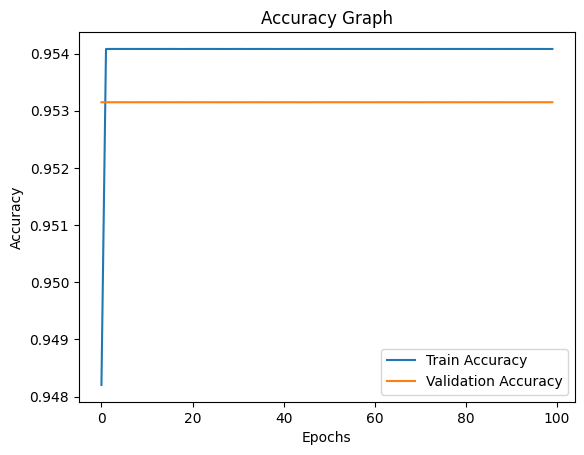

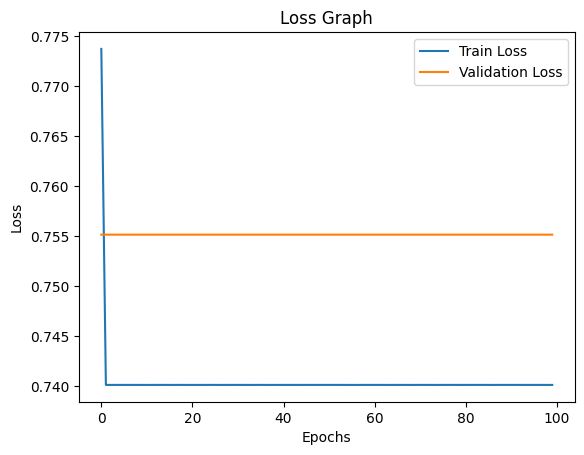

Model saved at: /content/drive/MyDrive/training/models/scnn_model_optimized.keras


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, Sequential
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Enable mixed precision training for faster execution
from tensorflow.keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')

# Set paths to your folders
frames_folder = '/content/drive/MyDrive/training/frames'
masks_folder = '/content/drive/MyDrive/training/lane-masks'

# Initialize an empty list to store the images and masks
X = []
Y = []

# Function to load images and masks
def load_images_and_masks(folder, is_mask=False, target_size=(128, 160)):
    if not os.path.exists(folder):
        print(f"Error: Directory {folder} does not exist.")
        return []
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        if img_path.endswith('.png') or img_path.endswith('.jpg'):
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE if is_mask else cv2.IMREAD_COLOR)
            img = cv2.resize(img, (target_size[1], target_size[0]))  # Resize to target dimensions
            if is_mask:
                img = img.astype('float32') / 25.0  # Normalize masks
                img = (img > 0.5).astype(np.uint8)  # Binarize masks
            images.append(img)
    return np.array(images)

# Load frames and masks
X = load_images_and_masks(frames_folder)
Y = load_images_and_masks(masks_folder, is_mask=True)

print(f"Loaded {len(X)} frames and {len(Y)} masks.")

# Normalize and reshape the dataset
X, Y = shuffle(X, Y, random_state=100)
Y = np.expand_dims(Y, axis=-1)

# Limit dataset size to speed up training
X = np.array(X[:2000])
Y = np.array(Y[:2000])

# Split dataset into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=100)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_val:", Y_val.shape)

# Data augmentation
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_gen = datagen.flow(X_train, Y_train, batch_size=4)
val_gen = datagen.flow(X_val, Y_val, batch_size=4)

# Define the optimized U-Net architecture
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, Concatenate
from tensorflow.keras.models import Model

def unet(input_size=(128, 160, 3)):
    inputs = Input(input_size)
    rescale = keras.layers.Rescaling(1./25)(inputs)

    # Encoder
    conv1 = Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(rescale)
    conv1 = Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    # Bottleneck
    conv4 = Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    drop4 = Dropout(0.5)(conv4)

    # Decoder
    up5 = Conv2D(128, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(drop4))
    merge5 = Concatenate(axis=3)([conv3, up5])
    conv5 = Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge5)

    up6 = Conv2D(64, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv5))
    merge6 = Concatenate(axis=3)([conv2, up6])
    conv6 = Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)

    up7 = Conv2D(32, 2, activation='relu', padding='same', kernel_initializer='he_normal')(UpSampling2D(size=(2,2))(conv6))
    merge7 = Concatenate(axis=3)([conv1, up7])
    conv7 = Conv2D(32, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)

    outputs = Conv2D(1, 1, activation='sigmoid')(conv7)

    model = Model(inputs=inputs, outputs=outputs)
    return model

model = unet()

# Compile the model
model.compile(optimizer='adam', loss=keras.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

# Train the model
epochs = 100
model_save_path = '/content/drive/MyDrive/training/models/scnn_model_optimized.keras'
callbacks = [
    keras.callbacks.ModelCheckpoint(model_save_path, save_best_only=True, monitor='val_loss', mode='min')
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=epochs,
    callbacks=callbacks
)

# Evaluate and visualize training
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(f"Model saved at: {model_save_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


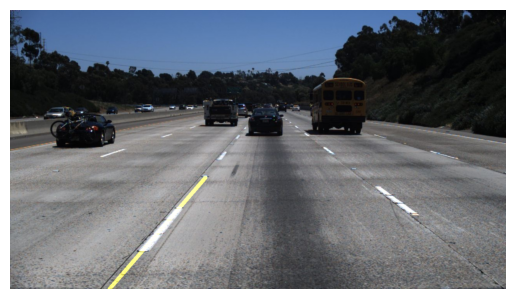

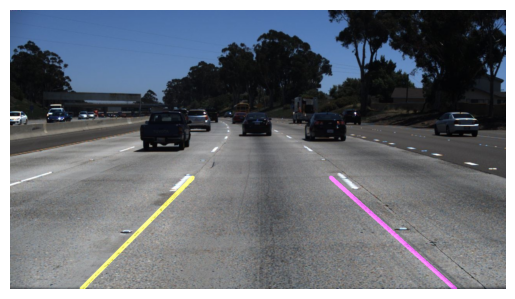

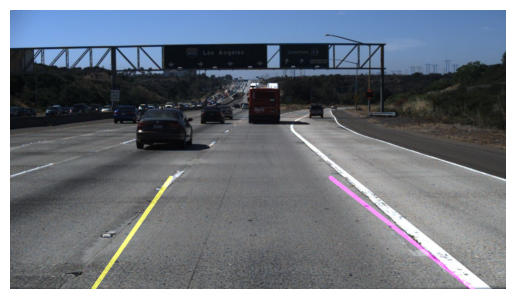

Improved lane detection for selected images completed. Check the output folder for results.


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Function to process a single image and detect lanes on both sides
def detect_lanes(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny edge detection
    edges = cv2.Canny(blur, 50, 150)

    # Define a region of interest (ROI)
    height, width = edges.shape
    mask = np.zeros_like(edges)
    polygon = np.array([[  # Adjust ROI for better coverage
        (width * 0.05, height),   # Bottom-left corner
        (width * 0.95, height),   # Bottom-right corner
        (width * 0.6, height * 0.55),  # Top-right point
        (width * 0.4, height * 0.55)   # Top-left point
    ]], dtype=np.int32)
    cv2.fillPoly(mask, polygon, 255)
    cropped_edges = cv2.bitwise_and(edges, mask)

    # Hough Transform to find lines
    lines = cv2.HoughLinesP(
        cropped_edges, rho=1, theta=np.pi / 180, threshold=30, minLineLength=50, maxLineGap=200
    )

    # Create an image to draw lanes
    lane_image = np.zeros_like(image)
    if lines is not None:
        left_lines = []
        right_lines = []

        # Separate lines based on slope
        for line in lines:
            x1, y1, x2, y2 = line[0]
            slope = (y2 - y1) / (x2 - x1 + 1e-6)
            if slope < -0.5:  # Negative slope -> Left lane
                left_lines.append(line)
            elif slope > 0.5:  # Positive slope -> Right lane
                right_lines.append(line)

        # Function to calculate the average line
        def average_line(lines):
            if not lines:
                return None
            x_coords = []
            y_coords = []
            for line in lines:
                x1, y1, x2, y2 = line[0]
                x_coords.extend([x1, x2])
                y_coords.extend([y1, y2])
            if len(x_coords) == 0 or len(y_coords) == 0:
                return None
            poly = np.polyfit(y_coords, x_coords, 1)
            y1, y2 = int(height), int(height * 0.6)
            x1, x2 = int(np.polyval(poly, y1)), int(np.polyval(poly, y2))
            return (x1, y1, x2, y2)

        # Draw averaged left and right lanes
        left_lane = average_line(left_lines)
        if left_lane:
            x1, y1, x2, y2 = left_lane
            cv2.line(lane_image, (x1, y1), (x2, y2), (0, 128, 128), 10)  # Green for left lane

        right_lane = average_line(right_lines)
        if right_lane:
            x1, y1, x2, y2 = right_lane
            cv2.line(lane_image, (x1, y1), (x2, y2), (128, 0, 128), 10)  # Blue for right lane


    # Overlay the lines on the original image
    overlay = cv2.addWeighted(image, 1, lane_image, 1, 0)
    return overlay

# Function to process selected images
def process_selected_images(input_folder, output_folder, selected_files):
    os.makedirs(output_folder, exist_ok=True)
    for filename in selected_files:
        img_path = os.path.join(input_folder, filename)
        if os.path.exists(img_path):
            image = cv2.imread(img_path)
            result = detect_lanes(image)

            # Save and display the result
            output_path = os.path.join(output_folder, f'result_{filename}')
            cv2.imwrite(output_path, result)
            plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.show()
        else:
            print(f"File not found: {img_path}")

# Input and output folder paths
input_folder = '/content/drive/MyDrive/training/frames'  # Replace with your folder path
output_folder = '/content/drive/MyDrive/training/results'

# List of 7 selected filenames
selected_files = [
    '0601_1495485177570314287.jpg',
    '0601_1495485123591495860.jpg',
    '0601_1495492800537479888.jpg',
]

# Process selected images
process_selected_images(input_folder, output_folder, selected_files)

print("Improved lane detection for selected images completed. Check the output folder for results.")